In [49]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.charts import Histogram, Bar
import random


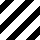
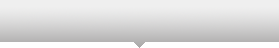
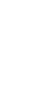
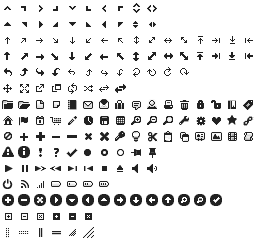
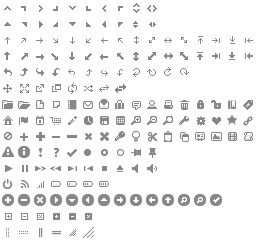
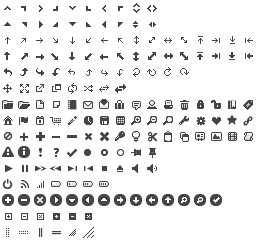
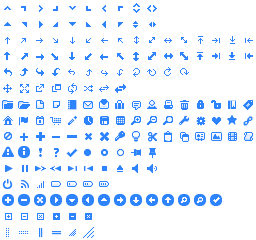
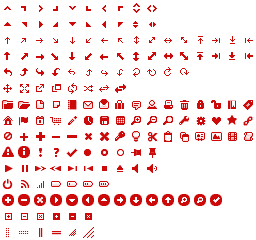
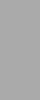
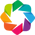
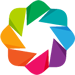
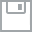
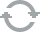
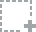
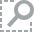
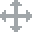
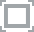
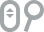

In [50]:
output_notebook()

The `random` module gives us lots of ways to get and use random numbers. Actually, it uses psuedo-random numbers. Without an external source of randomness, a computer cannot generate real random numbers.

Let's create our own random number generator.

In [3]:
def rng(seed=1):
    """This is a very simple psuedo-random number generator."""
    def rand():
        nonlocal seed
        seed = (7 * seed) % 101
        return (seed - 1) % 10 + 1

    return rand

In [18]:
randum = rng(879)

In [19]:
print(randum())
print(randum())
print(randum())
print(randum())


3
5
2
4


In [9]:
rand = rng(892)

In [ ]:
print(rand())
print(rand())
print(rand())

That seemed to work. What happens if we run it 100 times?

In [44]:
nums = [rand() for _ in range(100)]

In [45]:
hist = Histogram(nums, bins=10, notebook=True, tools=False, title="My RNG", ylabel="frequency", xlabel='distributions')


In [46]:
hist.height(400).show()

We got each number the same amount of times, which isn't very random. We'd expect that they'd be close, but not all the same.

Let's look at a random number generator implementation from BSD Unix. This is not a very good RNG -- it's too predictable -- but better than ours.

In [13]:
def bsd_rand(seed):
   def rand():
      nonlocal seed
      seed = (1103515245*seed + 12345) & 0x7fffffff
      return seed / 2147483647
   return rand

In [15]:
rand = bsd_rand(1)
nums = [rand() for _ in range(10000)]
hist = Histogram(nums, bins=10, notebook=True, tools=False, title="bsd_rand", ylabel="frequency", xlabel='distributions')
hist.height(400).show()

# The random module

Everything in the `random` module is built off of `random.random`. This is psuedo-random, as you can see here.

In [25]:
random.seed(1)
[random.random() for _ in range(5)]

[0.13436424411240122,
 0.8474337369372327,
 0.763774618976614,
 0.2550690257394217,
 0.49543508709194095]

In [23]:
random.seed(1)
[random.random() for _ in range(5)]

[0.13436424411240122,
 0.8474337369372327,
 0.763774618976614,
 0.2550690257394217,
 0.49543508709194095]

This is a better random number generator than ours, of course, so the numbers generated will not be 100% evenly distributed.

In [35]:
nums = [random.random() for _ in range(1000)]
hist = Histogram(nums, bins=50, notebook=True, tools=False, 
                 title="random.random", ylabel="frequency", xlabel='distributions')
hist.height(400).show()

In [55]:
words = {"joel": [1], "bekk": [5], "jeff": [3]}
hist = Bar(words, cat=list(words.keys()), notebook=True, tools=False,
           title="Word frequency", ylabel="frequency", 
           xlabel="distribution")
hist.height(400).show()

## Other distributions

In [36]:
nums = [random.triangular(0, 1) for _ in range(10000)]
hist = Histogram(nums, bins=30, notebook=True, tools=False, 
                 title="random.triangular", ylabel="frequency", xlabel='distributions')
hist.height(400).show()

In [38]:
nums = [random.gauss(0.5, 0.5) for _ in range(10000)]
hist = Histogram(nums, bins=30, notebook=True, tools=False, 
                 title="random.gauss", ylabel="frequency", 
                 xlabel='bekk distributions')
hist.height(400).show()

In [41]:
nums = [random.expovariate(2) for _ in range(100000)]
print(nums)
hist = Histogram(nums, bins=30, notebook=True, tools=False, 
                 title="random.expovariate", ylabel="frequency", 
                 xlabel='distributions')
hist.height(400).show()

[1.3770056423477468, 1.068498820881851, 0.12161726765788672, 0.27274185864643885, 1.0167308758663336, 0.2858901861088967, 0.634328764034487, 0.2690632625535917, 0.4446505064602148, 0.4323489873574277, 2.1596742449415247, 0.5600346569054238, 0.03556433091842034, 0.27110802511423154, 0.0616193509799828, 0.5782771235473064, 0.47530453324410327, 0.12375982212314071, 0.17585877806710654, 0.2522225983425254, 0.74196437776457, 1.2753982271184845, 0.19516041273387172, 1.2434494118044939, 0.24155979140786482, 0.3771871008704157, 0.561821742446704, 0.4131588767033996, 0.3463567485948999, 0.4348236891706671, 0.7242335304373553, 1.2012621276933013, 0.3640802808641169, 0.3912180251411681, 0.38484866183685706, 0.3399336403934083, 0.7623933494900436, 0.836380555896892, 0.3864714949475689, 0.5712558833309711, 0.4242090745634002, 0.09732854725920499, 0.6796335927712078, 0.3452698113797401, 0.04088340807626024, 0.5229393807565162, 0.5319162634355609, 0.6291919795292472, 0.17085718357788154, 0.3780384147